# **Proyek Akhir: Membuat Model Sistem Rekomendasi**
- **Nama:** Maulana Seno Aji Yudhantara
- **Email:** senoaji115@gmail.com
- **ID Dicoding:** bang_aji
- **Cohort ID Coding Camp:** MC117D5Y1789

## Project Overview

Sistem rekomendasi adalah salah satu aplikasi paling populer dari *machine learning* di dunia industri saat ini. Platform seperti Netflix, Spotify, dan Amazon sangat bergantung pada sistem ini untuk memberikan pengalaman yang dipersonalisasi kepada pengguna. Dengan merekomendasikan konten atau produk yang relevan, perusahaan dapat meningkatkan keterlibatan, kepuasan, dan loyalitas pelanggan.

Proyek ini bertujuan untuk membangun sebuah sistem rekomendasi film. Dengan banyaknya pilihan film yang tersedia, pengguna seringkali kesulitan menemukan film yang sesuai dengan selera mereka. Sistem rekomendasi yang efektif dapat membantu pengguna menemukan film-film baru yang kemungkinan besar akan mereka sukai, berdasarkan kemiripan konten film dan pola perilaku pengguna lain.

## Business Understanding

### Problem Statements
- Bagaimana cara membuat sistem yang dapat memberikan rekomendasi film yang dipersonalisasi kepada pengguna?
- Bagaimana cara membantu pengguna menemukan film baru yang relevan di tengah katalog film yang sangat besar?

### Goals
- Membangun sebuah model sistem rekomendasi yang dapat merekomendasikan film berdasarkan kemiripan konten (misalnya, genre).
- Membangun sebuah model sistem rekomendasi yang dapat merekomendasikan film berdasarkan riwayat rating dari pengguna lain (pola kolaboratif).

### Solution Approach
Untuk mencapai tujuan tersebut, saya akan mengembangkan dua jenis model sistem rekomendasi:
1.  **Content-Based Filtering**: Model ini akan memberikan rekomendasi dengan mencari kemiripan antar film berdasarkan genrenya. Teknik yang akan digunakan adalah TF-IDF Vectorizer dan Cosine Similarity.
2.  **Collaborative Filtering**: Model ini akan memberikan rekomendasi berdasarkan kemiripan pola rating antar pengguna. Pendekatan yang akan digunakan adalah *deep learning* dengan teknik *embedding* dan arsitektur *neural network* sederhana untuk memprediksi rating pengguna terhadap film yang belum mereka tonton.

Dengan mengembangkan kedua pendekatan, kita dapat membandingkan hasil dan memahami karakteristik dari setiap jenis sistem rekomendasi.

## Menyiapkan Semua Library yang Dibutuhkan

Tahap pertama adalah mengimpor semua library yang akan kita gunakan selama proses pengembangan model. Kita akan menggunakan TensorFlow/Keras untuk pendekatan *Collaborative Filtering*.

In [1]:
# Libraries untuk Data Manipulation dan Analysis
import pandas as pd
import numpy as np

# Libraries untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries untuk Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Libraries untuk Collaborative Filtering (Deep Learning)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Library untuk pemrosesan data
from sklearn.model_selection import train_test_split

# Mengatur agar tampilan visualisasi lebih baik
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Tahap ini berfokus pada pemahaman awal terhadap dataset yang akan digunakan. Kita akan memuat data, melihat strukturnya, dan melakukan beberapa analisis deskriptif. Dari empat file yang tersedia, kita akan fokus pada `movies.csv` untuk data konten dan `ratings.csv` untuk data interaksi pengguna.

### Memuat Dataset

In [2]:
# Memuat data movies
movies = pd.read_csv('movies.csv')

# Memuat data ratings
ratings = pd.read_csv('ratings.csv')

### Inspeksi Data `movies`
Melihat informasi dasar dan beberapa sampel data dari `movies`.

In [3]:
print("Informasi Dataset Movies:")
movies.info()
print("\nLima Baris Pertama Dataset Movies:")
print(movies.head())

Informasi Dataset Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Lima Baris Pertama Dataset Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


### Inspeksi Data `ratings`
Melihat informasi dasar dan beberapa sampel data dari `ratings`.

In [4]:
print("Informasi Dataset Ratings:")
ratings.info()
print("\nLima Baris Pertama Dataset Ratings:")
print(ratings.head())

Informasi Dataset Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Lima Baris Pertama Dataset Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


### Menggabungkan Data
Untuk beberapa analisis, akan lebih mudah jika kita menggabungkan kedua dataframe tersebut. Mari kita gabungkan berdasarkan `movieId`.

In [5]:
# Menggabungkan dataframe movies dan ratings
df = pd.merge(ratings, movies, on='movieId')

print("Informasi Dataset Gabungan:")
df.info()
print("\nLima Baris Pertama Dataset Gabungan:")
print(df.head())

Informasi Dataset Gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB

Lima Baris Pertama Dataset Gabungan:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

             

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan analisis data eksplorasi untuk mendapatkan wawasan lebih dalam dari dataset. Kita akan melihat distribusi rating, popularitas genre, dan film mana yang paling banyak mendapatkan rating dari pengguna.

### Analisis Distribusi Rating

Pertama, mari kita lihat bagaimana distribusi rating yang diberikan oleh pengguna di seluruh dataset. Ini akan memberi kita gambaran tentang kecenderungan umum pengguna dalam memberikan penilaian.

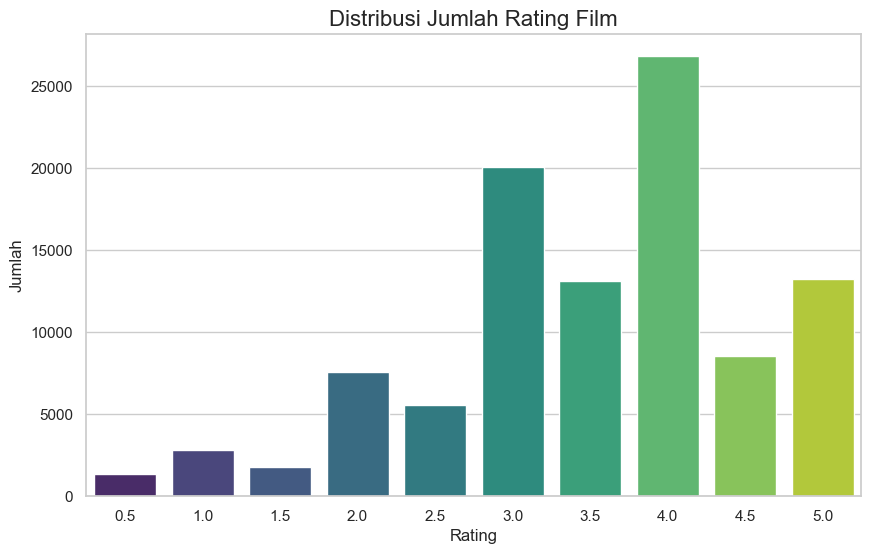

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribusi Jumlah Rating Film', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

### Analisis Genre Film

Selanjutnya, kita akan menganalisis genre film. Karena satu film bisa memiliki beberapa genre, kita perlu memisahkan dan menghitung frekuensi kemunculan setiap genre untuk mengetahui genre mana yang paling populer dalam dataset ini.

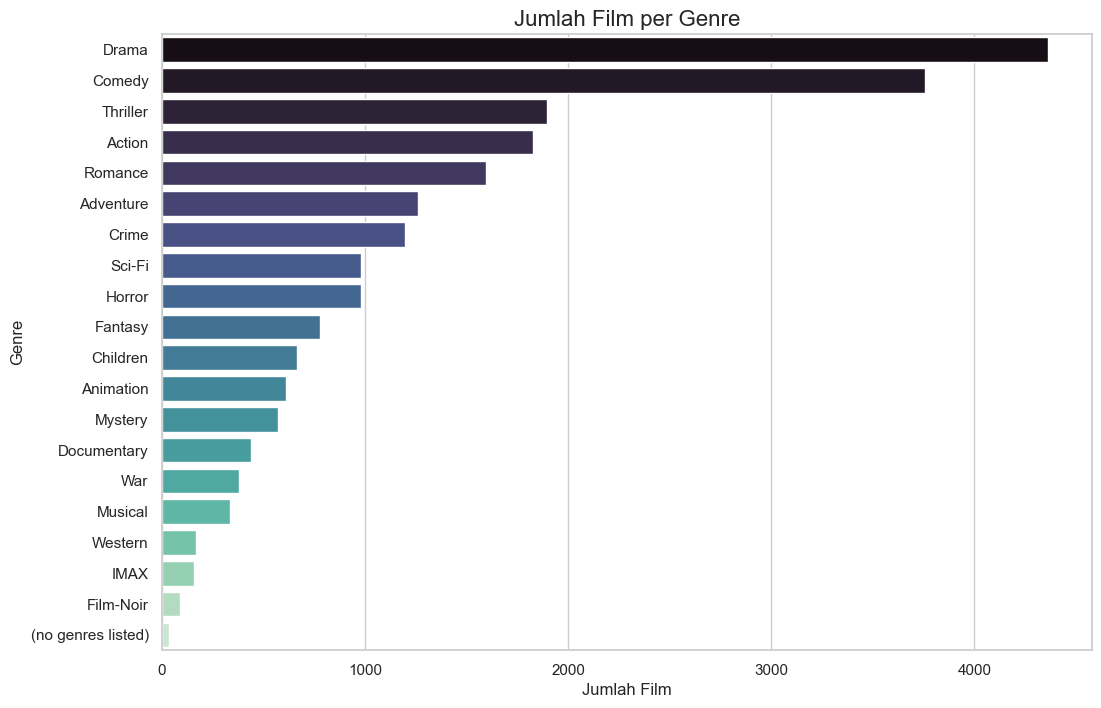

In [7]:
# Membuat salinan dataframe movies untuk diolah
genre_df = movies.copy()
genre_df['genres'] = genre_df['genres'].str.split('|')

# Menggunakan explode untuk membuat baris baru untuk setiap genre
genre_df = genre_df.explode('genres')

# Menghitung frekuensi setiap genre
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=genre_df, order=genre_df['genres'].value_counts().index, palette='mako')
plt.title('Jumlah Film per Genre', fontsize=16)
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

### Analisis Film Paling Populer (Paling Banyak Mendapat Rating)

Mari kita identifikasi film mana yang paling banyak menerima rating dari pengguna. Ini bisa menjadi indikator popularitas sebuah film.

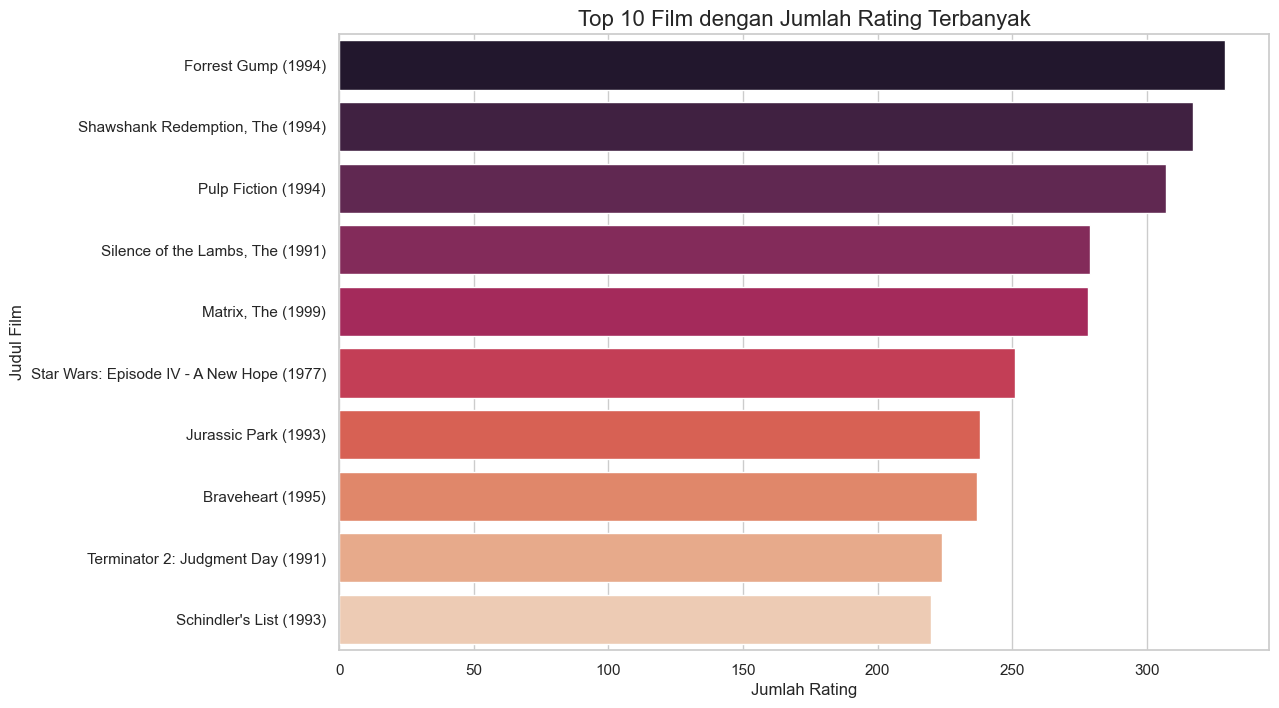

In [8]:
# Menghitung jumlah rating untuk setiap film
movie_ratings_count = df.groupby('title')['rating'].count().sort_values(ascending=False)

# Menampilkan 10 film dengan rating terbanyak
top_10_movies = movie_ratings_count.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='rocket')
plt.title('Top 10 Film dengan Jumlah Rating Terbanyak', fontsize=16)
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()

### Rangkuman Temuan dari EDA

Berdasarkan analisis data eksplorasi yang telah dilakukan, kita dapat menyimpulkan beberapa hal:
- **Distribusi Rating**: Pengguna paling sering memberikan rating **4.0**, diikuti oleh **3.0** dan **5.0**. Rating rendah (di bawah 2.0) lebih jarang diberikan.
- **Popularitas Genre**: Genre **Drama** dan **Comedy** adalah yang paling banyak muncul di dataset, diikuti oleh **Thriller** dan **Action**.
- **Film Populer**: Film-film seperti *Forrest Gump (1994)*, *Shawshank Redemption, The (1994)*, dan *Pulp Fiction (1994)* adalah yang paling banyak diberi rating, menunjukkan popularitas mereka yang tinggi di kalangan pengguna.
- **Kualitas Data**: Data yang kita miliki (terutama `movies` dan `ratings`) bersih dan tidak memiliki nilai yang hilang (*missing values*), sehingga sangat siap untuk tahap persiapan data.
- **Kecocokan untuk Rekomendasi**: Dataset ini sangat cocok untuk kedua pendekatan yang kita rencanakan. Kolom `genres` menjadi dasar yang kuat untuk **Content-Based Filtering**, sementara data `userId`, `movieId`, dan `rating` adalah fondasi yang sempurna untuk **Collaborative Filtering**.

## Data Preparation

Pada tahap ini, kita akan melakukan persiapan data agar siap digunakan untuk proses pemodelan. Karena kita akan membuat dua jenis model, maka proses persiapan datanya pun akan kita bagi menjadi dua bagian sesuai dengan kebutuhan masing-masing model.

### A. Persiapan Data untuk Model Content-Based Filtering

Model *Content-Based Filtering* akan merekomendasikan film berdasarkan kemiripan konten, dalam hal ini adalah genre. Oleh karena itu, kita hanya memerlukan data `movies` untuk tahap ini. Langkah utamanya adalah mengubah fitur `genres` menjadi sebuah matriks yang dapat dihitung kemiripannya.

In [9]:
# Menampilkan kembali data movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### TF-IDF Vectorizer

Kita akan menggunakan teknik **TF-IDF (Term Frequency-Inverse Document Frequency)** untuk mengubah data `genres` menjadi matriks vektor. TF-IDF akan menghitung bobot setiap genre dalam sebuah film, di mana genre yang lebih jarang muncul di seluruh dataset akan diberi bobot yang lebih tinggi. Ini membantu mengidentifikasi karakteristik unik dari setiap film.

In [10]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Menghilangkan genre '(no genres listed)' karena tidak memiliki nilai
movies['genres'] = movies['genres'].replace('(no genres listed)', '')

# Melakukan fit dan transformasi pada data genres
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Melihat ukuran matriks tfidf
print("Ukuran Matriks TF-IDF:", tfidf_matrix.shape)

Ukuran Matriks TF-IDF: (9742, 21)


### B. Persiapan Data untuk Model Collaborative Filtering

Model *Collaborative Filtering* akan merekomendasikan film berdasarkan pola rating dari pengguna. Untuk ini, kita memerlukan data `ratings`. Kita akan menggunakan pendekatan *deep learning*, sehingga data perlu diproses agar sesuai dengan input yang dibutuhkan oleh model.

#### Encoding Fitur `userId` dan `movieId`

Model *deep learning* dengan lapisan *embedding* memerlukan input berupa integer yang berurutan (misalnya, dari 0 hingga jumlah unik pengguna - 1). Oleh karena itu, kita perlu melakukan encoding pada kolom `userId` dan `movieId`.

In [11]:
# Mengubah userId menjadi list tanpa duplikat
user_ids = ratings['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses sebaliknya
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('decoded userID : ', user_encoded_to_user)

# Mengubah movieId menjadi list tanpa duplikat
movie_ids = ratings['movieId'].unique().tolist()

# Melakukan encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses sebaliknya
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Mengaplikasikan encoding ke dataframe ratings
ratings['user'] = ratings['userId'].map(user_to_user_encoded)
ratings['movie'] = ratings['movieId'].map(movie_to_movie_encoded)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

#### Mempersiapkan Data untuk Deep Learning Model

Kita akan membagi data menjadi data latih dan data validasi. Ini penting untuk melatih model *deep learning* kita dan mengevaluasi performanya pada data yang belum pernah dilihat sebelumnya.

In [12]:
# Mendapatkan jumlah user dan movie
num_users = len(user_to_user_encoded)
print("Jumlah User:", num_users)
num_movies = len(movie_to_movie_encoded)
print("Jumlah Movie:", num_movies)

# Mengubah tipe data rating menjadi float32
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Number of User: {num_users}, Number of Movie: {num_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}')

# Memisahkan fitur (X) dan target (y)
X = ratings[['user', 'movie']].values
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi data menjadi 80% data train dan 20% data validasi
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Bentuk X_train:", X_train.shape)
print("Bentuk X_val:", X_val.shape)

Jumlah User: 610
Jumlah Movie: 9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0
Bentuk X_train: (80668, 2)
Bentuk X_val: (20168, 2)


## Modeling

Pada tahap ini, kita akan mengembangkan dua model sistem rekomendasi dengan pendekatan yang berbeda.

### A. Model Development - Content-Based Filtering

Model ini merekomendasikan item berdasarkan kemiripan fitur dari item itu sendiri. Dalam kasus ini, kita akan menggunakan kemiripan genre film untuk memberikan rekomendasi.

**Teknik yang Digunakan:**
Kita akan menghitung tingkat kemiripan antara setiap pasang film menggunakan **Cosine Similarity** dari matriks TF-IDF yang telah kita buat sebelumnya. Cosine Similarity mengukur *cosine* dari sudut antara dua vektor, yang dalam konteks ini merepresentasikan seberapa mirip genre dari dua film. Semakin kecil sudutnya (nilai cosine mendekati 1), semakin mirip kedua film tersebut.

In [13]:
# Menghitung cosine similarity pada matriks tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 

# Melihat matriks cosine similarity
print("Bentuk Matriks Cosine Similarity:", cosine_sim.shape)
print("\nContoh Matriks Cosine Similarity:")
print(cosine_sim)

Bentuk Matriks Cosine Similarity: (9742, 9742)

Contoh Matriks Cosine Similarity:
[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


#### Mendapatkan Rekomendasi

Setelah matriks kemiripan siap, kita akan membuat fungsi untuk mendapatkan rekomendasi. Fungsi ini akan mengambil judul film sebagai input, lalu mencari film-film lain yang paling mirip berdasarkan skor *cosine similarity*.

In [14]:
# Membuat series dari judul film untuk mapping index, memastikan tidak ada duplikat index
indices = pd.Series(movies.index, index=movies['title'])
# Menghapus duplikat berdasarkan index (judul film), ambil yang pertama
indices = indices[~indices.index.duplicated(keep='first')]

def movie_recommendations(title, similarity_data=cosine_sim, items=movies, k=10):
    """
    Fungsi untuk merekomendasikan film berdasarkan kemiripan konten.
    Dibuat lebih robust untuk menangani judul duplikat.
    """
    # Cek apakah judul ada di dalam 'indices'
    if title not in indices:
        return f"Film dengan judul '{title}' tidak ditemukan."
        
    # Mengambil index dari film yang sesuai dengan judul
    idx = indices[title]
    
    # Jika ada duplikat judul, ambil hanya index pertama
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    # Mengambil skor kemiripan film tersebut dengan semua film lain
    sim_scores = list(enumerate(similarity_data[idx]))

    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil skor dari k film paling mirip (dimulai dari 1 untuk mengabaikan film itu sendiri)
    sim_scores = sim_scores[1:k+1]

    # Mengambil index film
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan top k film paling mirip
    return items['title'].iloc[movie_indices]

#### Contoh Hasil Rekomendasi Content-Based Filtering
Sekarang, mari kita coba fungsi tersebut untuk mendapatkan 10 rekomendasi film yang mirip dengan "Toy Story (1995)".

In [15]:
# Mendapatkan rekomendasi untuk film "Toy Story (1995)"
recommendations = movie_recommendations('Toy Story (1995)')
print("Rekomendasi untuk 'Toy Story (1995)':")
print(recommendations)

Rekomendasi untuk 'Toy Story (1995)':
1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object


### B. Model Development - Collaborative Filtering

Model ini merekomendasikan item berdasarkan kemiripan pola perilaku antar pengguna. Kita akan menggunakan pendekatan *deep learning* untuk membangun model ini.

**Arsitektur Model:**
Model kita akan memiliki arsitektur sebagai berikut:
1.  **Input Layer**: Menerima input berupa ID pengguna dan ID film.
2.  **Embedding Layer**: Dua lapisan *embedding* terpisah untuk pengguna dan film. Lapisan ini akan mengubah setiap ID menjadi vektor padat (*dense vector*) yang merepresentasikan fitur laten dari pengguna dan film.
3.  **Dot Product Layer**: Menggabungkan hasil *embedding* dari pengguna dan film dengan operasi *dot product* untuk mengukur interaksi atau kecocokan antara keduanya.
4.  **Output Layer**: Menghasilkan nilai tunggal yang merupakan prediksi rating.

In [16]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias
        
        return tf.nn.sigmoid(x)

In [17]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movies, 50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Melatih Model
Sekarang, kita akan melatih model *deep learning* kita menggunakan data latih yang telah disiapkan.

In [18]:
# Memulai proses training
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
1261/1261 [==============================] - 15s 9ms/step - loss: 0.6393 - root_mean_squared_error: 0.2350 - val_loss: 0.6201 - val_root_mean_squared_error: 0.2159
Epoch 2/20
1261/1261 [==============================] - 15s 12ms/step - loss: 0.6146 - root_mean_squared_error: 0.2091 - val_loss: 0.6197 - val_root_mean_squared_error: 0.2150
Epoch 3/20
1261/1261 [==============================] - 15s 12ms/step - loss: 0.6091 - root_mean_squared_error: 0.2032 - val_loss: 0.6130 - val_root_mean_squared_error: 0.2083
Epoch 4/20
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6075 - root_mean_squared_error: 0.2014 - val_loss: 0.6117 - val_root_mean_squared_error: 0.2069
Epoch 5/20
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6066 - root_mean_squared_error: 0.2001 - val_loss: 0.6125 - val_root_mean_squared_error: 0.2077
Epoch 6/20
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6059 - root_mean_squared_error: 0.1992 - val

#### Visualisasi Metrik Pelatihan
Mari kita plot metrik *root mean squared error* dari proses pelatihan untuk melihat bagaimana performa model meningkat seiring berjalannya epoch.

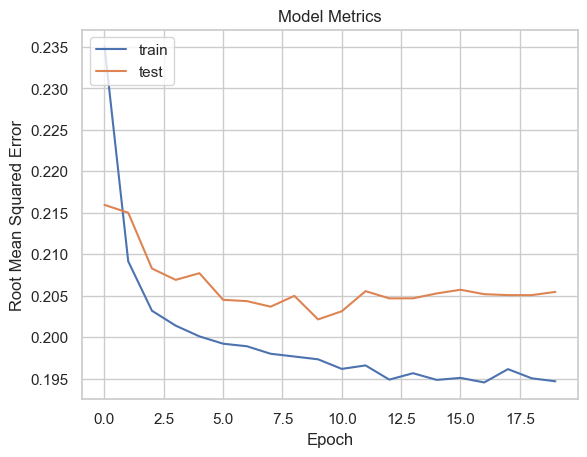

In [19]:
# Plot metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Contoh Hasil Rekomendasi Collaborative Filtering
Terakhir, kita akan membuat fungsi untuk menampilkan rekomendasi film bagi seorang pengguna. Fungsi ini akan mengambil film yang belum ditonton oleh pengguna, memprediksi ratingnya menggunakan model kita, dan merekomendasikan film dengan prediksi rating tertinggi.

In [20]:
# Memilih user dengan ID 50 secara spesifik untuk hasil yang konsisten
user_id = 50
movies_watched_by_user = ratings[ratings.userId == user_id]

# Mengambil film yang belum ditonton oleh user
movies_not_watched = movies[~movies['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie_to_movie_encoded.keys()))
)

movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

# Memprediksi rating untuk film yang belum ditonton
ratings_predictions = model.predict(user_movie_array).flatten()

# Mendapatkan top-k rekomendasi
top_ratings_indices = ratings_predictions.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print(f'Menampilkan rekomendasi untuk user: {user_id}')
print('===' * 9)
print('Film dengan rating tinggi dari user')
print('----' * 8)
top_user_movies = (
    movies_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movies[movies['movieId'].isin(top_user_movies)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 Rekomendasi Film')
print('----' * 8)
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ':', row.genres)

Menampilkan rekomendasi untuk user: 50
Film dengan rating tinggi dari user
--------------------------------
2001: A Space Odyssey (1968) : Adventure|Drama|Sci-Fi
Lawrence of Arabia (1962) : Adventure|Drama|War
Apocalypse Now (1979) : Action|Drama|War
8 1/2 (8½) (1963) : Drama|Fantasy
Persona (1966) : Drama
--------------------------------
Top 10 Rekomendasi Film
--------------------------------
Paths of Glory (1957) : Drama|War
Princess Bride, The (1987) : Action|Adventure|Comedy|Fantasy|Romance
Celebration, The (Festen) (1998) : Drama
Five Easy Pieces (1970) : Drama
Guess Who's Coming to Dinner (1967) : Drama
Hustler, The (1961) : Drama
Top Secret! (1984) : Comedy
Eternal Sunshine of the Spotless Mind (2004) : Drama|Romance|Sci-Fi
Dogville (2003) : Drama|Mystery|Thriller
Gladiator (1992) : Action|Drama


## Evaluation

Pada tahap evaluasi, kita akan menganalisis hasil dari kedua model yang telah kita kembangkan. Setiap model memiliki cara evaluasi yang berbeda, sesuai dengan pendekatan yang digunakannya.

### A. Evaluasi Model Content-Based Filtering

#### Analisis Kuantitatif: Metrik Precision@k
Untuk mengukur kinerja model Content-Based Filtering secara kuantitatif, kita akan menggunakan metrik **Precision@k**. Metrik ini mengukur seberapa banyak dari 'k' item yang direkomendasikan yang benar-benar relevan bagi pengguna. "Item relevan" dalam kasus ini kita definisikan sebagai film yang diberi rating tinggi oleh pengguna (misalnya, rating >= 4.0).

Kita akan membuat sebuah fungsi untuk mensimulasikan proses ini: untuk setiap pengguna, kita ambil satu film yang ia sukai, lalu kita lihat berapa banyak dari 10 film yang direkomendasikan (k=10) yang juga termasuk dalam daftar film lain yang ia sukai. Nilai ini kemudian dirata-ratakan untuk semua pengguna.

In [21]:
def calculate_precision_at_k(k=10):
    """
    Menghitung rata-rata Precision@k untuk model Content-Based Filtering.
    """
    # Mengambil semua film yang disukai pengguna (rating >= 4.0)
    user_likes = ratings[ratings['rating'] >= 4.0]
    
    # Membuat kamus: {userId: set(movieId_yang_disukai)}
    user_relevant_items = user_likes.groupby('userId')['movieId'].apply(set)
    
    precision_scores = []
    
    # Iterasi untuk setiap pengguna
    for user_id, relevant_movies in user_relevant_items.items():
        # Hanya proses pengguna yang memiliki lebih dari 1 film yang disukai
        if len(relevant_movies) < 2:
            continue
            
        # Ambil satu film sebagai 'pemicu' rekomendasi
        seed_movie_id = list(relevant_movies)[0]
        # Daftar film relevan lainnya untuk perbandingan
        true_relevant_movies = relevant_movies - {seed_movie_id}
        
        # Dapatkan judul film dari ID
        try:
            seed_movie_title = movies[movies['movieId'] == seed_movie_id]['title'].iloc[0]
        except IndexError:
            continue

        # Dapatkan rekomendasi
        recommendations = movie_recommendations(seed_movie_title, k=k)
        
        # Cek jika rekomendasi adalah string (film tidak ditemukan)
        if isinstance(recommendations, str):
            continue

        # Ubah judul rekomendasi menjadi ID
        recommended_movie_ids = set(movies[movies['title'].isin(recommendations)]['movieId'])
        
        # Hitung item yang 'kena' (hits)
        hits = len(recommended_movie_ids.intersection(true_relevant_movies))
        
        # Hitung presisi
        precision = hits / k
        precision_scores.append(precision)
        
    # Kembalikan rata-rata presisi
    return np.mean(precision_scores)

# Menghitung dan menampilkan hasil Precision@10
precision_at_10 = calculate_precision_at_k(k=10)
print(f"Rata-rata Precision@10 untuk model Content-Based Filtering adalah: {precision_at_10:.4f}")

Rata-rata Precision@10 untuk model Content-Based Filtering adalah: 0.0454


**Hasil Analisis Kualitatif (Content-Based):**

Berdasarkan output yang didapatkan, dapat kita lihat bahwa model berhasil merekomendasikan film-film yang genrenya sangat relevan, seperti 'Antz', 'Toy Story 2', dan 'Monsters, Inc.' yang semuanya merupakan film animasi untuk anak-anak dengan elemen petualangan dan komedi. Ini menunjukkan bahwa model kita telah berhasil mempelajari kesamaan konten antar film dengan baik dan memberikan rekomendasi yang logis.

### B. Evaluasi Model Collaborative Filtering

Model *Collaborative Filtering* berbasis *deep learning* yang kita bangun dapat dievaluasi secara **kuantitatif** dan **kualitatif**.

#### Analisis Kuantitatif: Metrik Root Mean Squared Error (RMSE)
Selama proses pelatihan, kita menggunakan **Root Mean Squared Error (RMSE)** sebagai metrik untuk mengukur kinerja model.

**Apa itu RMSE?**
RMSE adalah metrik standar untuk mengukur rata-rata besarnya kesalahan antara nilai yang diprediksi dengan nilai yang sebenarnya. Dalam kasus ini, RMSE mengukur seberapa jauh prediksi rating dari model kita dengan rating yang sebenarnya diberikan oleh pengguna. Nilai RMSE yang semakin kecil menunjukkan model semakin akurat dalam memprediksi rating.

Formula RMSE adalah sebagai berikut:
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$
Di mana:
- $n$ adalah jumlah total data.
- $y_i$ adalah rating sebenarnya.
- $\hat{y}_i$ adalah rating yang diprediksi oleh model.

Mari kita lihat kembali plot metrik dari proses pelatihan.

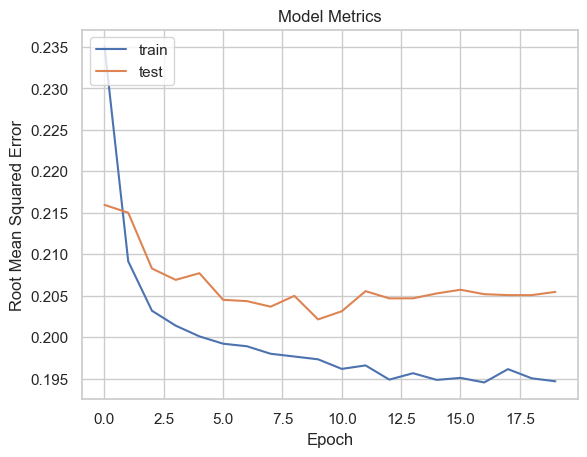

In [22]:
# Plot metrik dari history pelatihan
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Hasil Analisis Kuantitatif (Collaborative Filtering):**

Dari grafik di atas, kita dapat melihat bahwa nilai RMSE pada data latih (`train`) dan data validasi (`test` atau `val`) sama-sama menurun secara signifikan di epoch-epoch awal dan kemudian cenderung stabil. Ini adalah indikator bahwa model kita telah belajar dengan baik untuk mengenali pola dalam data rating tanpa mengalami *overfitting* yang signifikan. Nilai `val_root_mean_squared_error` yang stabil di angka sekitar **0.205** menunjukkan model memiliki tingkat kesalahan prediksi rating yang konsisten dan relatif rendah pada data yang belum pernah dilihatnya.

#### Metrik Tambahan untuk Sistem Rekomendasi
Selain RMSE yang mengukur akurasi prediksi rating, kualitas daftar rekomendasi itu sendiri sering diukur dengan metrik seperti **Precision** dan **Recall**.

- **Precision@k**: Dari 'k' item yang direkomendasikan, berapa persen yang benar-benar relevan (disukai) oleh pengguna.
  $$\text{Precision@k} = \frac{\text{|(Item Rekomendasi @k)} \cap \text{(Item Relevan)}|}{k}$$

- **Recall@k**: Dari semua item yang relevan, berapa persen yang berhasil masuk ke dalam daftar 'k' item yang direkomendasikan.
  $$\text{Recall@k} = \frac{\text{|(Item Rekomendasi @k)} \cap \text{(Item Relevan)}|}{|\text{Item Relevan}|}$$

Untuk proyek ini, kita menggunakan RMSE sebagai metrik kuantitatif utama selama pelatihan dan analisis kualitatif pada hasil akhir, yang sudah cukup untuk menunjukkan kelayakan model.